<a href="https://www.kaggle.com/code/saswattulo/geometric-brownian-motion-simulation-for-btc-usd?scriptVersionId=170652505" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Geometric Brownian Motion

The Geometric Brownian Motion <b>(GBM)</b> is a continuous-time stochastic process in which the logarithm of the randomly varying quantity follows a Brownian motion (also called a Wiener process) with drift. This method is used to model stock prices in the Black–Scholes model and is the most widely used model of stock price behavior.

The Geometric Brownian Motion equation is represented as:

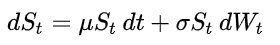

Where:
* <b>S(t)</b> is the price of a security/portfolio at time t
* <b>σ</b> is the volatility of the security’s price
* <b>µ</b> is mean return (per unit time).
* <b>dS(t)</b> infinitesimal increment in price
* <b>dW(t)</b> infinitesimal increment of a standard Brownian
Motion/Wiener Process


In [1]:
!pip install yfinance

import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as stats

import datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 36.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=291653 sha256=1c0660ce76720392231533476f413370708f62a71de74c1337c1c2cbf850c453
  Stored in directory: /root/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee


In [2]:
stock_data = yf.Ticker('BTC-USD')
data = stock_data.history(start='2024-01-01', end='2024-06-04', auto_adjust=False, actions=False)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-01 00:00:00+00:00,42280.234375,44175.437500,42214.976562,44167.332031,44167.332031,18426978443
2024-01-02 00:00:00+00:00,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536
2024-01-03 00:00:00+00:00,44961.601562,45503.242188,40813.535156,42848.175781,42848.175781,46342323118
2024-01-04 00:00:00+00:00,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210
2024-01-05 00:00:00+00:00,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347


In [3]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-02 00:00:00+00:00,69705.023438,69708.382812,64586.593750,65446.972656,65446.972656,50705240709
2024-04-03 00:00:00+00:00,65446.671875,66914.320312,64559.898438,65980.812500,65980.812500,34488018367
2024-04-04 00:00:00+00:00,65975.695312,69291.257812,65113.796875,68508.843750,68508.843750,34439527442
2024-04-05 00:00:00+00:00,68515.757812,68725.757812,66011.476562,67837.640625,67837.640625,33748230056
2024-04-06 00:00:00+00:00,67845.937500,68169.734375,67532.992188,67839.062500,67839.062500,22789298176


# Calculating returns

In [4]:
data['Returns'] = data['Adj Close'].pct_change()
data.dropna(inplace=True)

# Distribution of returns

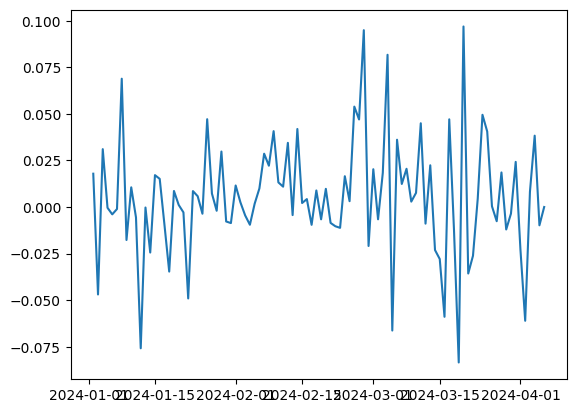

In [5]:
plt.plot(data['Returns'])

(array([ 3.,  3.,  3.,  9., 35., 24.,  9.,  6.,  1.,  3.]),
 array([-0.08343357, -0.06539771, -0.04736185, -0.02932598, -0.01129012,
         0.00674574,  0.0247816 ,  0.04281746,  0.06085332,  0.07888918,
         0.09692505]),
 <BarContainer object of 10 artists>)

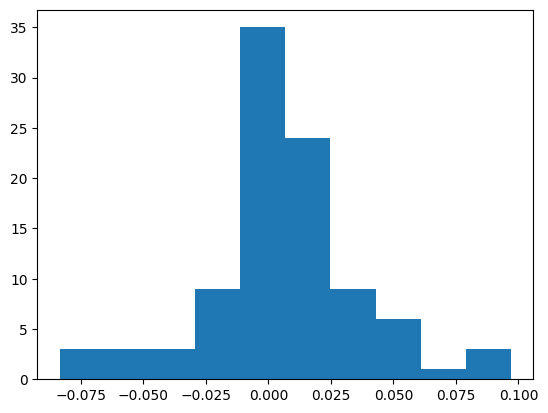

In [6]:
plt.hist(data['Returns'])

## Shapiro-Wilk Test

* <b>H0:</b> the sample comes from a normal distribution
* <b>H1:</b> the sample does not come from a normal distribution

In [7]:
shapiro_test = stats.shapiro(data['Returns'])
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test Statistic: 0.9601725935935974
Shapiro-Wilk Test p-value: 0.005241416394710541


We don't reject the null hypothesis that the data is normally distributed

# GBM simulation

In [8]:
mu = data['Returns'].mean()
sigma = data['Returns'].std()
S0 = data['Adj Close'].iloc[-1]  # Initial price

In [9]:
S0

67839.0625

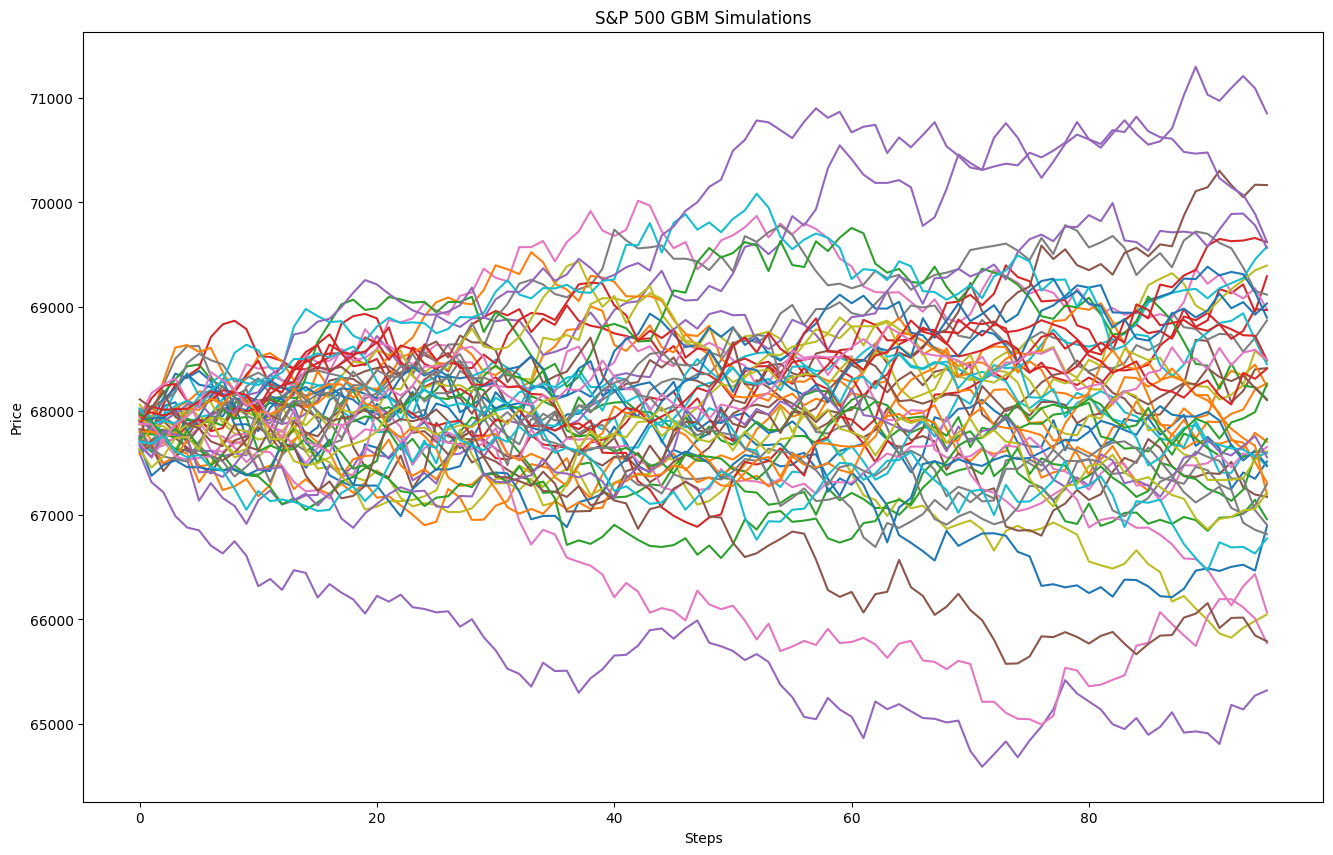

In [10]:
T = 252
N = len(data)

plt.figure(figsize=(16,10))

for i in range(50):
    dt = 1 / T
    t = np.linspace(0, 1, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)  # Brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)  # Geometric Brownian motion
    plt.plot(S, label=f'Simulation {i+1}')

plt.xlabel('Steps')
plt.ylabel('Price')
plt.title('S&P 500 GBM Simulations')
plt.show()